In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from math import trunc
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
# Load dataset
# Breast cancer
breast_cancer = load_breast_cancer()

# Play tennis
df = pd.read_csv('play_tennis.csv')

# Transform
le = preprocessing.LabelEncoder()

# Data
play_tennis_data = {}
play_tennis_data['day'] = list(le.fit_transform(df['day']))
play_tennis_data['outlook'] = list(le.fit_transform(df['outlook']))
play_tennis_data['humidity'] = list(le.fit_transform(df['humidity']))
play_tennis_data['wind'] = list(le.fit_transform(df['wind']))
play_tennis_data['play'] = list(le.fit_transform(df['play']))

# Initialize label and target
play_tennis_label = []
play_tennis_target = []

# Inset label and target
for i in range(len(play_tennis_data['day'])):
    label = []
    label.append(play_tennis_data['outlook'][i])
    label.append(play_tennis_data['humidity'][i])
    label.append(play_tennis_data['wind'][i])
    
    play_tennis_label.append(label)
    play_tennis_target.append(play_tennis_data['play'][i])

# Feature names
play_tennis_data['feature_names'] = ['outlook', 'humidity', 'wind']

In [3]:
# Split training and test data
def split_data(label, target):
    x_train, x_test, y_train, y_test = train_test_split(label, target, test_size=0.2, train_size=0.8)
    return x_train, x_test, y_train, y_test

# Split breast cancer
bc_x_train, bc_x_test, bc_y_train, bc_y_test = split_data(breast_cancer.data, breast_cancer.target)

# Split play tennis
pt_x_train, pt_x_test, pt_y_train, pt_y_test = split_data(play_tennis_label, play_tennis_target)

## ID3Estimator

In [4]:
import six
import sys
sys.modules['sklearn.externals.six'] = six 
from id3 import Id3Estimator, export_text

def id3Estimator(x_train, x_test, y_train, y_test, feature_names):
    # Fit
    estimator = Id3Estimator()
    estimator.fit(x_train, y_train)
    
    # Visualize
    r = export_text(estimator.tree_, feature_names)
    print(f"Tree{r}")
    
    # Predict
    pred = estimator.predict(x_test)
    
    # Score
    # Accuracy
    acc_score = accuracy_score(y_test, pred)
    # F1 Score
    f_score = f1_score(y_test, pred)
    print(f"Accuracy score : {acc_score}")
    print(f"F1 score       : {f_score}")

ModuleNotFoundError: No module named 'id3'

In [5]:
# Breast cancer
id3Estimator(bc_x_train, bc_x_test, bc_y_train, bc_y_test, breast_cancer.feature_names)

NameError: name 'id3Estimator' is not defined

In [ ]:
# Play tennis
id3Estimator(pt_x_train, pt_x_test, pt_y_train, pt_y_test, play_tennis_data['feature_names'])

## Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
def logisticRegression(x_train, x_test, y_train, y_test):
    # Fit
    clf = LogisticRegression(random_state=0, max_iter=10000)
    clf.fit(x_train, y_train)
    
    # Visualisasi model
    #
    
    # Predict
    pred = clf.predict(x_test)
    
    # Score
    # Accuracy
    acc_score = accuracy_score(y_test, pred)
    # F1 Score
    f_score = f1_score(y_test, pred)
    
    print(f"Accuracy score : {acc_score}")
    print(f"F1 score       : {f_score}")

In [8]:
# Breast cancer
logisticRegression(bc_x_train, bc_x_test, bc_y_train, bc_y_test)

Accuracy score : 0.9649122807017544
F1 score       : 0.972972972972973


In [9]:
# Play tennis
logisticRegression(pt_x_train, pt_x_test, pt_y_train, pt_y_test)

Accuracy score : 0.6666666666666666
F1 score       : 0.8


## Decision Tree Classifier

In [10]:
def decision_tree_classifier(X, X_test, y, y_test):
    # Learning process
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X,y)
    tree.plot_tree(clf)
    
    # Prediction
    y_pred = clf.predict(X_test)

    # Test
    print("Accuracy score :", accuracy_score(y_test, y_pred))
    print("F1 score       :", f1_score(y_test, y_pred))

Accuracy score : 0.8947368421052632
F1 score       : 0.918918918918919


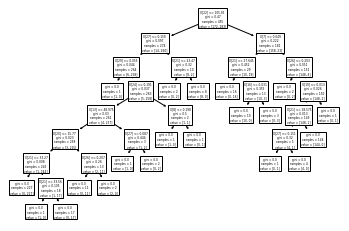

In [11]:
#  Dataset 1 : breast cancer
decision_tree_classifier(bc_x_train, bc_x_test, bc_y_train, bc_y_test)

Accuracy score : 0.6666666666666666
F1 score       : 0.8


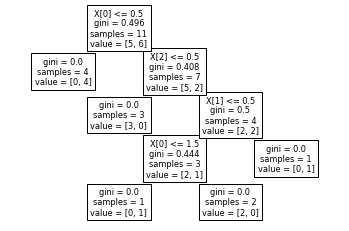

In [12]:
# Dataset 2 : play tennis
decision_tree_classifier(pt_x_train, pt_x_test, pt_y_train, pt_y_test)

## K-Means

In [13]:
def k_means(X, X_test, y, y_test):
    # Learning process
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    
    # Prediction
    y_pred = kmeans.predict(X_test)
    
    # Visualizing
#     plt.subplot(221)
#     plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
#     plt.title("K Means Clustering")
#     plt.subplot(221)
#     plt.clf()
#     plt.show()
    
    # Testing
    print("Accuracy score :", accuracy_score(y_test, y_pred))
    print("F1 score       :", f1_score(y_test, y_pred))

In [14]:
# Dataset 1 : breast cancer
k_means(bc_x_train, bc_x_test, bc_y_train, bc_y_test)

Accuracy score : 0.11403508771929824
F1 score       : 0.0


In [15]:
# Dataset 2 : play_tennis
k_means(pt_x_train, pt_x_test, pt_y_train, pt_y_test)

Accuracy score : 0.3333333333333333
F1 score       : 0.5


## Neural Network

In [21]:
def neural_network(X, X_test, y, y_test):
    # Learning process
    clf = MLPClassifier(random_state=1, max_iter=300, tol=8e-4).fit(X, y)
    
    # Prediction
    y_pred = clf.predict(X_test)
    
    # Testing
    print("Accuracy score :", accuracy_score(y_test, y_pred))
    print("F1 score       :", f1_score(y_test, y_pred))

In [22]:
# Dataset 1 : breast cancer
neural_network(bc_x_train, bc_x_test, bc_y_train, bc_y_test)

Accuracy score : 0.9649122807017544
F1 score       : 0.972972972972973


In [23]:
# Dataset 2 : play tennis
neural_network(pt_x_train, pt_x_test, pt_y_train, pt_y_test)

Accuracy score : 0.6666666666666666
F1 score       : 0.8
